## Simple Linear Regression

Compulsary Task 1

In [2]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from random import choice
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline 

Plot a scatter plot with age on the x-axis and charges on the y-axis

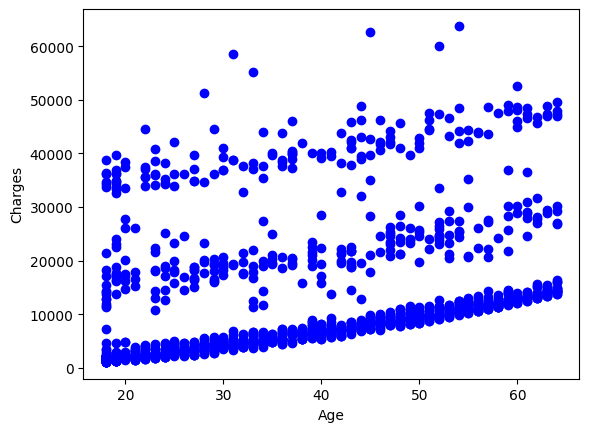

In [3]:
# Import the data
df = pd.read_csv("insurance.csv")

# Select columns for x and y axis using loc and iloc functions
x = df.loc[:,"age"].values
y = df.iloc[:,-1].values

# plot the data on a scatterplot
plt.scatter(x,y,color = 'b')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

Using linear_model.LinearRegression() from sklearn, fit a model to
your data, and make predictions on data

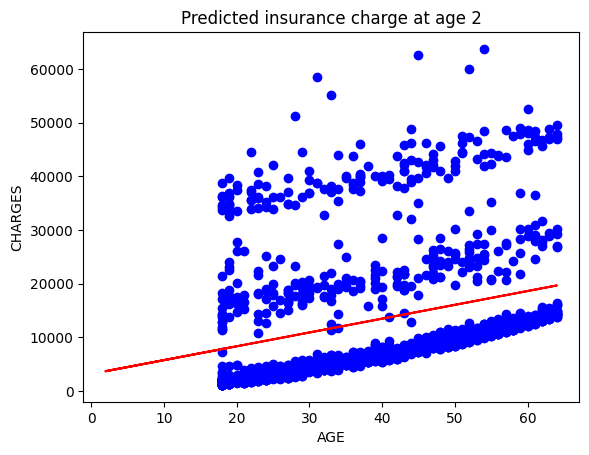

Estimated insurance charge at 2 is: 3681.33 units.
Coefficient : [257.72261867]
Intercept : 3165.8850060630284
Regression line: y = 3165.89 + 257.72x


In [4]:
# Predict insurance charges at a random age (outside the age range in the dataset)

# create linear regression model for charges
charges_model = LinearRegression()

# reshape x from 1D to 2D array
charges_model.fit(x.reshape(-1,1),y) 

# generate random age to make charge preditions on later
rand_age = choice([i for i in range(0,100) if i not in range(18,64)])
unk_x = [[rand_age]] 

# 
x_pred = np.append(x, unk_x).reshape(-1,1)
y_pred = charges_model.predict(x_pred)

# create scatterplot with regression line
plt.scatter(x,y,color = 'b')
plt.plot(x_pred,y_pred,color = 'r')
plt.xlabel('AGE')
plt.ylabel('CHARGES')
plt.title(f"Predicted insurance charge at age {rand_age}")
plt.show()

# output info realting to chart
print(f"Estimated insurance charge at {rand_age} is:", format(charges_model.predict(unk_x)[0],".2f"), "units.")
print(f"Coefficient : {charges_model.coef_}")
print(f"Intercept : {charges_model.intercept_}")
print(f"Regression line: y = {round(charges_model.intercept_,2)} + {round(charges_model.coef_[0],2)}x")


## Evaluating the model


In [7]:
# use cross-validation to evaluate the model
scores = cross_val_score(charges_model, x.reshape(-1,1), y, cv=5)
#print("Cross-validation scores: {}".format(scores))
mean_score = np.mean(scores)
std_score = np.std(scores)
print("Mean Cross-validation score : {:.2f}".format(mean_score))
print("""\nA MCV of 0.09 suggests this is a very poor regression fit for the current model. 
      the scatter plot looks asif there are three separate trends, suggesting there is another
      factor influencing the charges in combination with age. """)
print("\nStandarad dev Cross-validation score : {:.2f}".format(std_score))

Mean Cross-validation score : 0.09

A MCV of 0.09 suggests this is a very poor regression fit for the current model. 
      the scatter plot looks asif there are three separate trends, suggesting there is another
      factor influencing the charges in combination with age. 

Standarad dev Cross-validation score : 0.03


Plot another scatter plot with the best-fit line.

Text(18, 62000, 'y = 3165.885 + 257.723x')

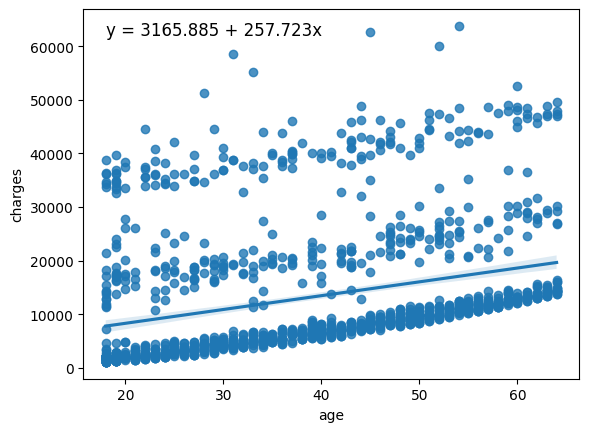

In [6]:
# create scatterplot using seaborn
scatter_plot =sns.regplot(data=df, x='age',y='charges')

#calculate slope and intercept of regression equation using scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=scatter_plot.get_lines()[0].get_xdata(),
                                                       y=scatter_plot.get_lines()[0].get_ydata())

# add regression equation to plot
plt.text(18, 62000, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x', fontsize = "12")